<a href="https://colab.research.google.com/github/asantone/BioBuilder/blob/main/bgalActivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages(c("viridis", "kableExtra"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridExtra’, ‘webshot’




In [2]:
#load libraries for extra help
library(readr)
library(ggplot2)
library(viridis)
library(knitr)
library(kableExtra)
library(dplyr)
library(tibble)
library(tidyr)

#=================
#color definitions
#=================

#neutral for the reference
reference<-"#cccccc"      

#selections from viridis palette
weak  <-viridis(10)[5] 
medium<-viridis(10)[7] 
strong<-viridis(10)[9] 
s1   <-viridis(30)[12]
s2   <-viridis(30)[14]
s3   <-viridis(30)[16]
s4   <-viridis(30)[18]
s5   <-viridis(30)[20]
s6   <-viridis(30)[22]
s7   <-viridis(30)[24]
s8   <-viridis(30)[26]
s9   <-viridis(30)[28]

Loading required package: viridisLite


Attaching package: ‘dplyr’


The following object is masked from ‘package:kableExtra’:

    group_rows


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
#set seed for reproducibility
set.seed(12345)

#data count
n<-10000

#generate and organize data for 10 beta-gal activity readings
strain_2_R<-tibble(strain="2_R", promoter="Reference", rbs="Reference",activity=rnorm(n, mean=101, sd=45))  
strain_2_1<-tibble(strain="2_1", promoter="Weak",      rbs="Weak",activity=rnorm(n,      mean=75,  sd=34))
strain_2_2<-tibble(strain="2_2", promoter="Medium",    rbs="Medium",activity=rnorm(n,    mean=138, sd=61))
strain_2_3<-tibble(strain="2_3", promoter="Strong",    rbs="Strong",activity=rnorm(n,    mean=195, sd=87))
strain_2_4<-tibble(strain="2_4", promoter="Weak",      rbs="Weak",activity=rnorm(n,      mean=61,  sd=27))
strain_2_5<-tibble(strain="2_5", promoter="Medium",    rbs="Medium",activity=rnorm(n,    mean=165, sd=74))
strain_2_6<-tibble(strain="2_6", promoter="Medium",    rbs="Strong",activity=rnorm(n,    mean=210, sd=94))
strain_2_7<-tibble(strain="2_7", promoter="Weak",      rbs="Weak",activity=rnorm(n,      mean=90,  sd=40))
strain_2_8<-tibble(strain="2_8", promoter="Medium",    rbs="Medium",activity=rnorm(n,    mean=230, sd=103))
strain_2_9<-tibble(strain="2_9", promoter="Strong",    rbs="Strong",activity=rnorm(n,    mean=373, sd=167))

#combine the data
main<-rbind(strain_2_R,
            strain_2_1,
            strain_2_2,
            strain_2_3,
            strain_2_4,
            strain_2_5,
            strain_2_6,
            strain_2_7,
            strain_2_8,
            strain_2_9)

#convert strings to factor type and force the order of the levels
main$strain   <- factor(main$strain, levels=c("2_R", "2_1", "2_2", "2_3", "2_4", "2_5", "2_6", "2_7", "2_8", "2_9"))
main$promoter <- factor(main$promoter , levels=c("Reference", "Weak", "Medium", "Strong"))
main$rbs      <- factor(main$rbs ,      levels=c("Reference", "Weak", "Medium", "Strong"))

#write to csv
#write_csv(main,"bgal_activity.csv")

#quick inspection of the first few values of the generated data
head(main, n=10)

#display data volume
cat("There are",nrow(main), "observations in this dataset.")

strain,promoter,rbs,activity
<fct>,<fct>,<fct>,<dbl>
2_R,Reference,Reference,127.34880
2_R,Reference,Reference,132.92597
2_R,Reference,Reference,96.08135
2_R,Reference,Reference,80.59263
2_R,Reference,Reference,128.26494
2_R,Reference,Reference,19.19198
2_R,Reference,Reference,129.35443
2_R,Reference,Reference,88.57172
2_R,Reference,Reference,88.21281


There are 100000 observations in this dataset.

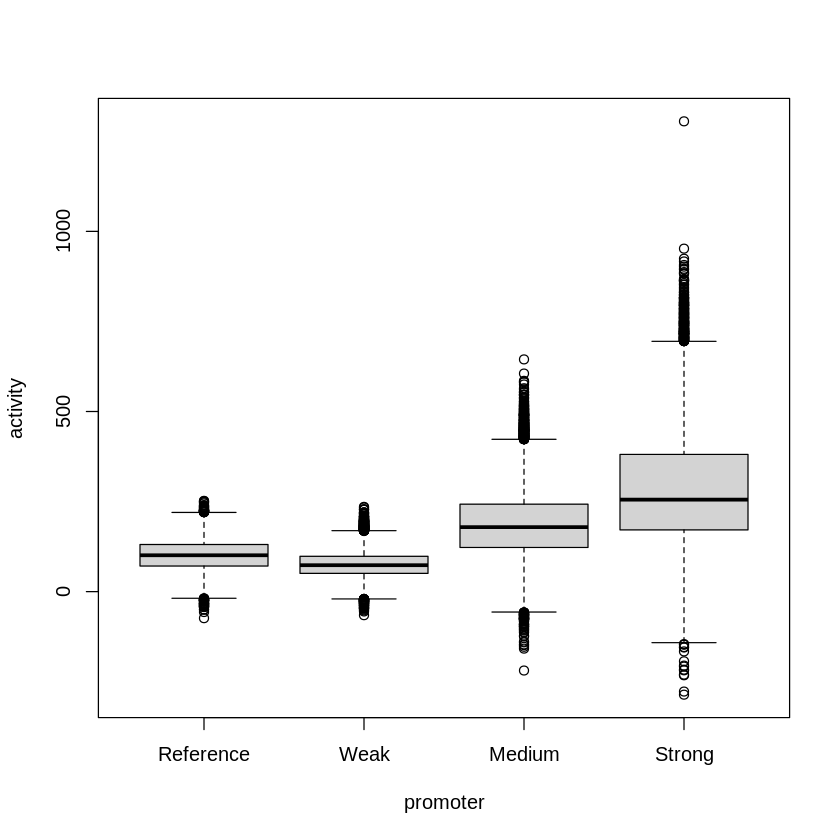

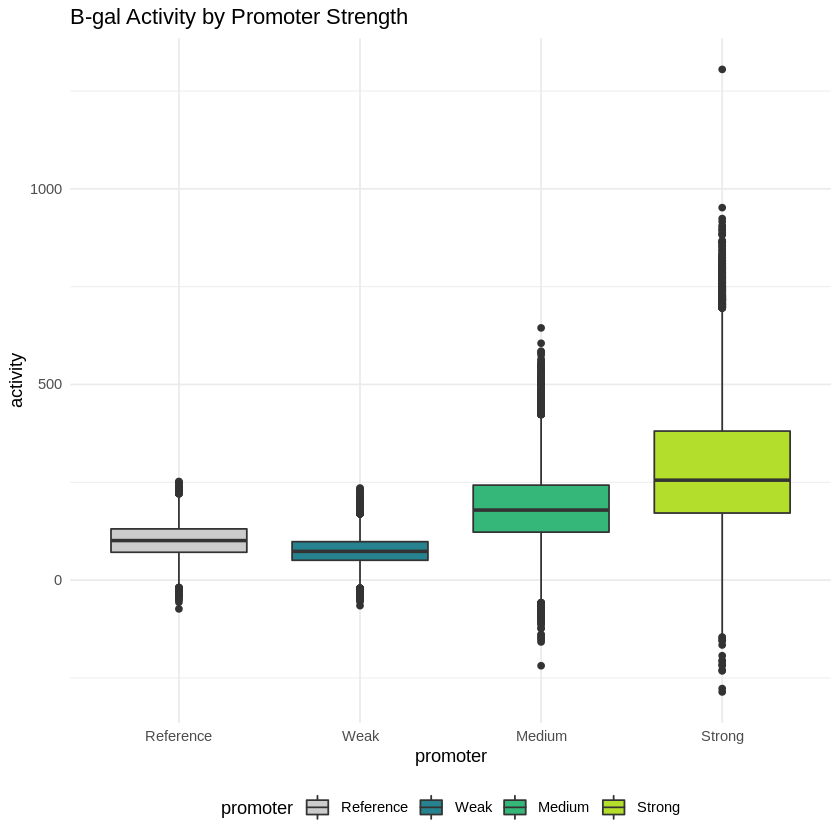

In [4]:
#using base R graphics
boxplot(activity ~ promoter, data = main)

#using ggplot2 (more control, better appearance typically)
ggplot(main, aes(x=promoter, y=activity, fill=promoter))+
  geom_boxplot()+
  scale_fill_manual(values=c(reference, weak, medium, strong))+
  theme_minimal()+
  theme(legend.position="bottom")+
  labs(title="B-gal Activity by Promoter Strength")

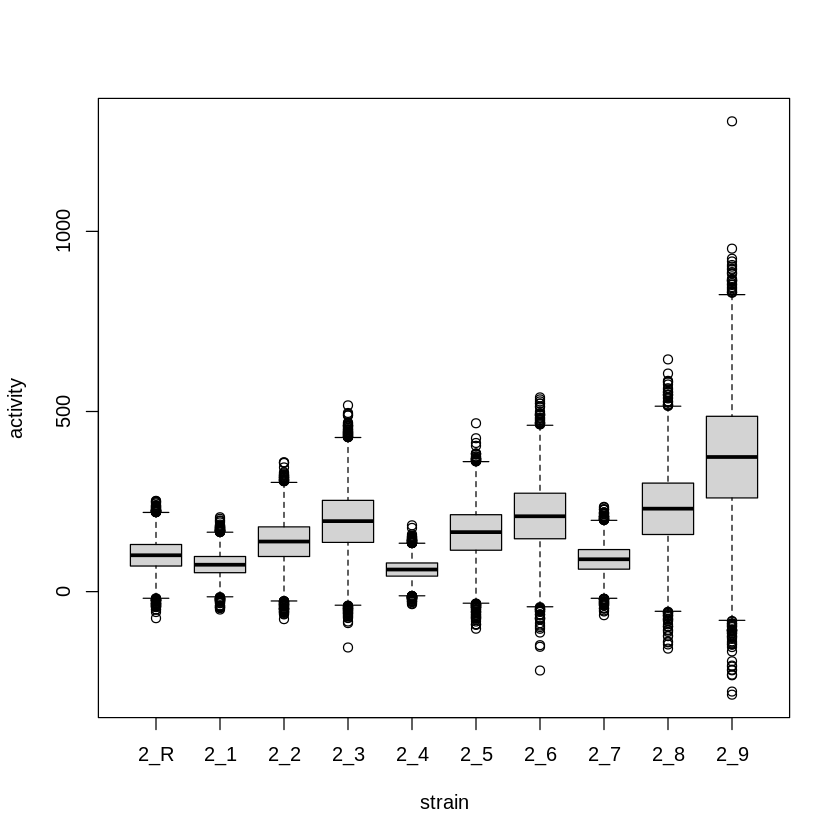

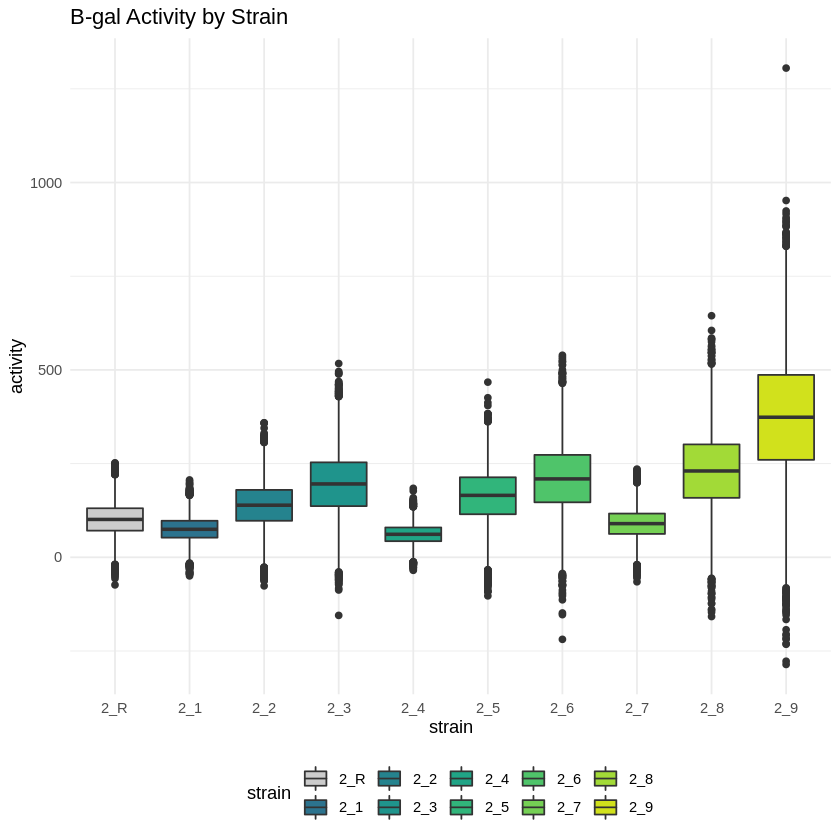

In [5]:
#using base R graphics
boxplot(activity ~ strain, data = main)

#using ggplot2
ggplot(main, aes(x=strain, y=activity, fill=strain))+
  geom_boxplot()+
  scale_fill_manual(values=c(reference,s1,s2,s3,s4,s5,s6,s7,s8,s9))+
  theme_minimal()+
  theme(legend.position="bottom")+
  labs(title="B-gal Activity by Strain")

In [6]:
table<-main %>% group_by(strain, promoter,rbs) %>% summarise(mean = mean(activity), sd = sd(activity)) %>% arrange(mean)
table


`summarise()` has grouped output by 'strain', 'promoter'. You can override using the `.groups` argument.



strain,promoter,rbs,mean,sd
<fct>,<fct>,<fct>,<dbl>,<dbl>
2_4,Weak,Weak,61.23674,27.31415
2_1,Weak,Weak,74.92159,33.54945
2_7,Weak,Weak,89.72023,40.23149
2_R,Reference,Reference,100.96896,44.99325
2_2,Medium,Medium,138.57513,61.10683
2_5,Medium,Medium,164.01195,73.42276
2_3,Strong,Strong,195.31917,85.92951
2_6,Medium,Strong,209.76932,93.71044
2_8,Medium,Medium,230.48184,104.27585



── Column specification ────────────────────────────────────────────────────────
cols(
  Category = col_double(),
  default = col_double()
)




Category,default
<dbl>,<dbl>
0,0
1,0
2,0
3,0
4,0
5,0



Call:
lm(formula = bg$default ~ bg$Category)

Residuals:
    Min      1Q  Median      3Q     Max 
-111.62  -51.87  -22.34   64.05  109.41 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.9303504  1.6711617   5.344 9.43e-08 ***
bg$Category 0.3854574  0.0004713 817.813  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 65.49 on 6140 degrees of freedom
Multiple R-squared:  0.9909,	Adjusted R-squared:  0.9909 
F-statistic: 6.688e+05 on 1 and 6140 DF,  p-value: < 2.2e-16


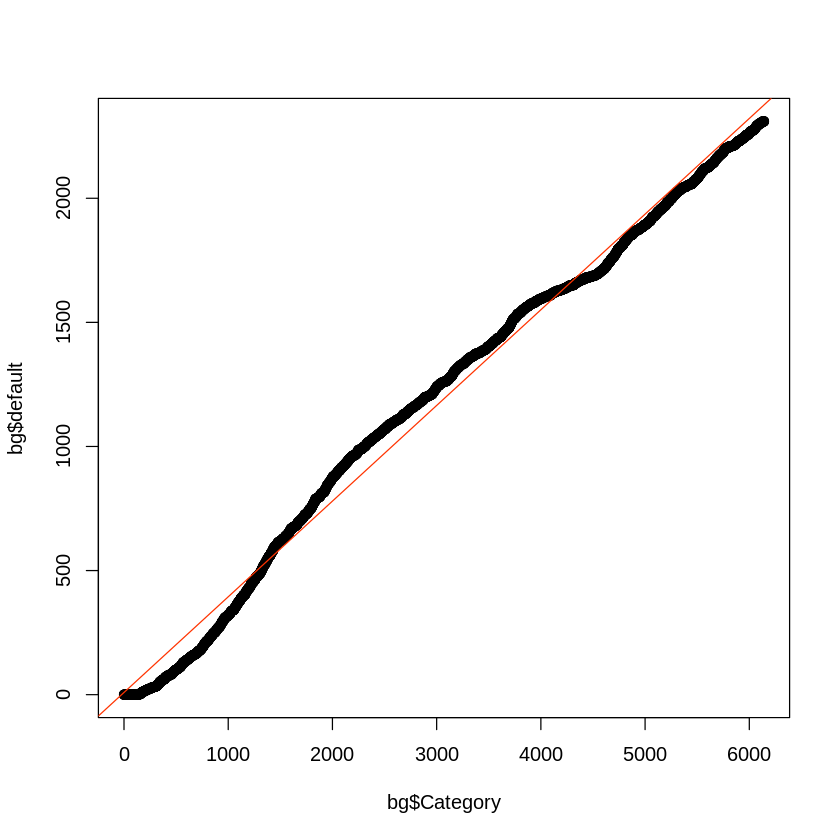

In [8]:
#load the data 
bg<-read_csv("/content/beta-galactosidase-activ.csv")

#inspect the first few rows
head(bg)

#create a linear model
model<-lm(bg$default~bg$Category)

#plot the points with base R (quick and easy inspection)
plot(bg$Category, bg$default)
#draw the line of best fit using the linear model
abline(model, col="#ff3300")

#display the linear model summary information
#useful to assess the relationship strength and direction
#useful to assess statistical significance 
summary(model)

In [9]:
#print a statement about the relationship
#format is Y = mx + b (slope + intercept form)
#useful for thinking about predictions within the range
cat("B-gal activity is approximately equal to ",modelSummary$coefficients[2], "* Category +", modelSummary$coefficients[1])

ERROR: ignored